# Encontro 04

## Materiais de apoio:

* The Scientist and Engineer's Guide to Digital Signal Processing, de By Steven W. Smith, Ph.D. (capítulo 22)
	* Disponível em http://www.dspguide.com

## Tópicos Abordados:

* Processamento de Áudio em Python:
	* Pacote librosa;
	* Reprodução de sons no ambiente Google Colab;
	* Importação e exportação de arquivos .wav;
	* Espectrograma de áudio;
	* Geração de tons;

* Conceitos de Processamento de Áudio:
  * Objetivo e usos;
  * Características da audição humana;
  * Timbre e conteúdo harmônico;
  * Áudio Analógico x Áudio Digital;
  * Qualidade de som x Taxa de dados;
  * Áreas proeminentes:
    * Reprodução musical com alta fidelidade;
    * Telecomunicação;
    * Síntese de fala e sons.

* Exemplo de aplicação:
	* Equalizador de sons de 9 bandas.

## Elaboração:
* Eng. Rodrigo de Marca França.


In [ ]:
# Importação de módulos e instalação de bibliotecas adicionais

# Importação do pacote matématico Math
import math

# Importação do pacote Pandas
import pandas as pd

# Importação dos pacotes NumPy e SciPy
import numpy as np
from scipy.interpolate import interp1d
from scipy import signal

# Importação do pacote librosa e alguns componentes
import librosa
import librosa.display

# Importação do pacote SoundFile
!pip install soundfile
import soundfile as sf

# Importação do pacote IPython.display
import IPython.display as ipd

# Importação de Widgets
import ipywidgets as widgets

# Importação do pacote PyPlot do MatPlotLib
import matplotlib.pyplot as plt

# Instalação e importação do pacote mpld3
!pip install mpld3
import mpld3

# importação do módulo timeit
import timeit


     |████████████████████████████████| 890kB 5.2MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.2-cp37-none-any.whl size=200617 sha256=7e611716ea4bc06054e0db2bf34555dadbaa586bc16a629ced7c450755122b3c
  Stored in directory: /root/.cache/pip/wheels/21/73/06/ea4b85609301850b1289a282852d92e22fcbf7a250ed5f547f
Successfully built mpld3


In [ ]:
# Diretiva do Notebook para exibição de gráficos inline
%matplotlib inline

# Configuração do tamanho dos gráficos
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
# Importação de dados do Google Drive

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

filepath_input = 'My Drive/Colab Notebooks/Processamento_Digital_de_Sinais_Aplicacoes_Praticas/Encontro_04/Recursos/'
filepath_output = 'My Drive/Colab Notebooks/Processamento_Digital_de_Sinais_Aplicacoes_Praticas/Encontro_04/Gerados/'

Mounted at /gdrive
/gdrive


## Processamento de Áudio em Python:

O pacote `librosa` é um pacote Python especializado em análise de áudio e música. Possui diversas funções para análise e geração de áudio. Sua documentação pode ser encontrada em https://librosa.org/doc/latest/index.html.
Serão exploradas apenas algumas funções do pacote, sendo um pacote bem completo para analise de áudio.

### Reprodução de sons no ambiente Google Colab

Podemos reproduzir sons diretamente do Google Colab, podemos usar o recurso `IPython.display`. O áudio a ser reproduzido é representado por um vetor de amostras e sua taxa de amostragem.

In [ ]:
# Reprodução de som

# Parametros do som
sound_frequency_hz = 440
sound_sampling_rate = 44100
sound_duration_s = 2

# Criação do som
sound_time = np.linspace(0, sound_duration_s, sound_sampling_rate*sound_duration_s, endpoint=False)
sound = np.sin(2*np.pi*sound_frequency_hz*sound_time)

# Executa o áudio gerado
ipd.Audio(sound, rate=sound_sampling_rate)

### Importação e exportação de arquivos de áudio

Usando o comando `load` do pacote `librosa`, podemos importar arquivos de áudio com facilidade para dentro do Python. Esses arquivos são importados como um vetor de amostras e uma taxa de amostragem. 

Através do comando `write` do pacote `soundfile`, podemos gravar um vetor de dados como um arquivo de som.

Os arquivos de exemplo usanos são retirados do site freesound (https://freesound.org) que possui uma grande coleção de diferentes áudios disponibilizados de forma gratuita.

In [ ]:
# Importação de arquivos de áudio

# Realiza o carregamento do arquivo de áudio
#piano_wav_sound, piano_wav_sampling_rate = librosa.load(filepath_input + '186942__lemoncreme__piano-melody.wav') 
piano_wav_sound, piano_wav_sampling_rate = librosa.load(filepath_input + '186942__lemoncreme__piano-melody.wav', mono=True, sr=None) 

# Executa o áudio carregado
ipd.Audio(piano_wav_sound, rate=piano_wav_sampling_rate)

In [ ]:
# Exportação de arquivos de áudio

# Escreve o arquivo de áudio como 24bit PCM WAV
sf.write(filepath_output + 'sound_file.wav', sound, sound_sampling_rate, subtype='PCM_24')

# Escreve o arquivo de áudio como 24bit Flac
sf.write(filepath_output + 'sound_file.flac', sound, sound_sampling_rate, format='flac', subtype='PCM_24')

# Escreve o arquivo de áudio como 16bit OGG
sf.write(filepath_output + 'sound_file.ogg', sound, sound_sampling_rate, format='ogg', subtype='vorbis')

### Forma de Onda e Espectrograma de áudio

O pacote `librosa` também permite com facilidade a visualização da forma de onda e o espectrograma de um áudio através das funções `waveplot` e `specshow`.

Para arquivos de áudio (em especial música), normalmente não é interessante a realização da DFT, pois além da grande quantidade de amostras é um sinal que possui variações de frequência no tempo. O resultado é um espectro de frequências não muito claro. Uma maneira de visualizar como as frequências de um áudio variam com o tempo é o espectrograma de áudio. Um espectrograma é uma maneira interessante de caracterizar um determinado áudio.

Text(0.5, 0, 'Tempo [s]')

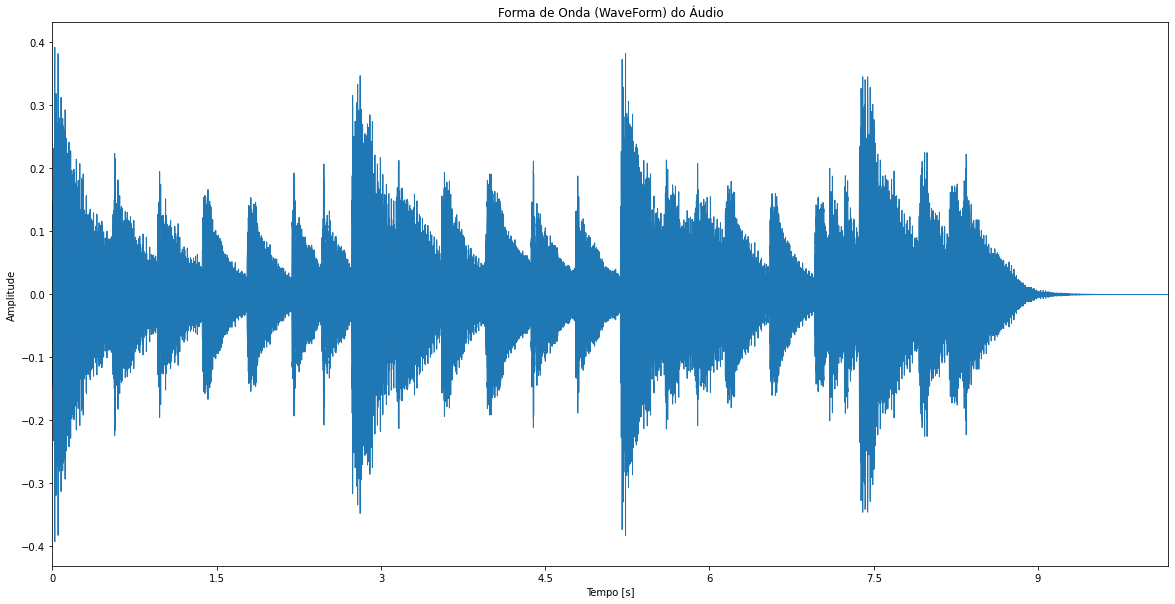

In [ ]:
# Geração de uma Forma de Onda

# Exibição da Forma de Onda
fig = plt.figure()
librosa.display.waveplot(piano_wav_sound, sr=piano_wav_sampling_rate)
plt.title('Forma de Onda (WaveForm) do Áudio')
plt.ylabel('Amplitude')
plt.xlabel('Tempo [s]')

Text(0.5, 0, 'Tempo [s]')

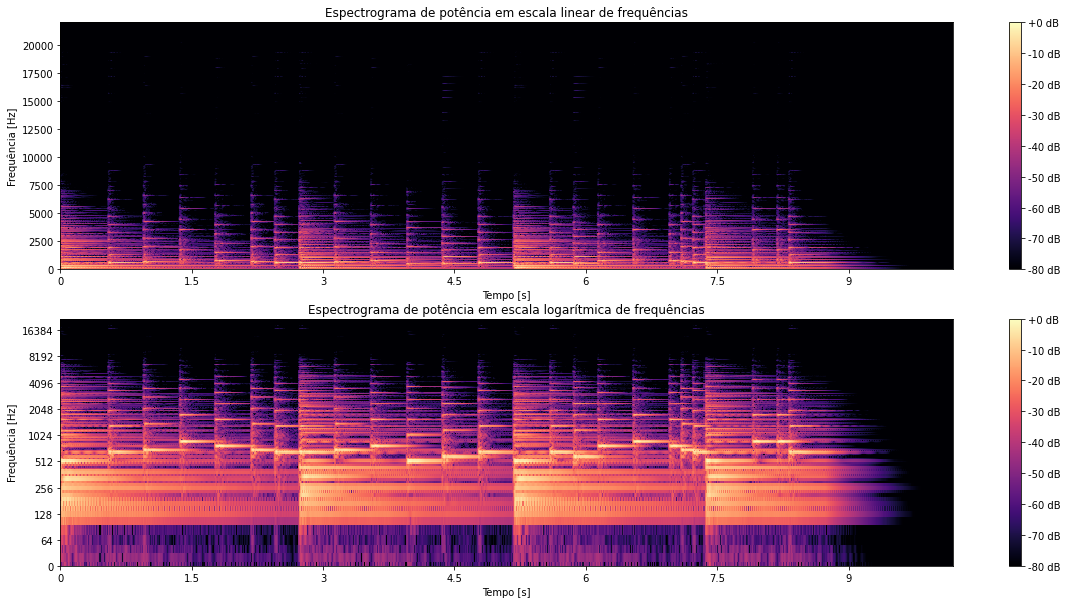

In [ ]:
# Geração de um Espectrograma

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(piano_wav_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala linear no primeiro subplot
plt.subplot(2, 1, 1)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=piano_wav_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala linear de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Exibição do espectrograma em escala logarítmica no segundo subplot
plt.subplot(2, 1, 2)
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=piano_wav_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')


### Geração de tons e sons

Também temos as funções `tone`, e `chirp` que permitem a criação de um tom ou um chirp, respectivamente. Essas funções facilitam a geração de artefatos de áudio.

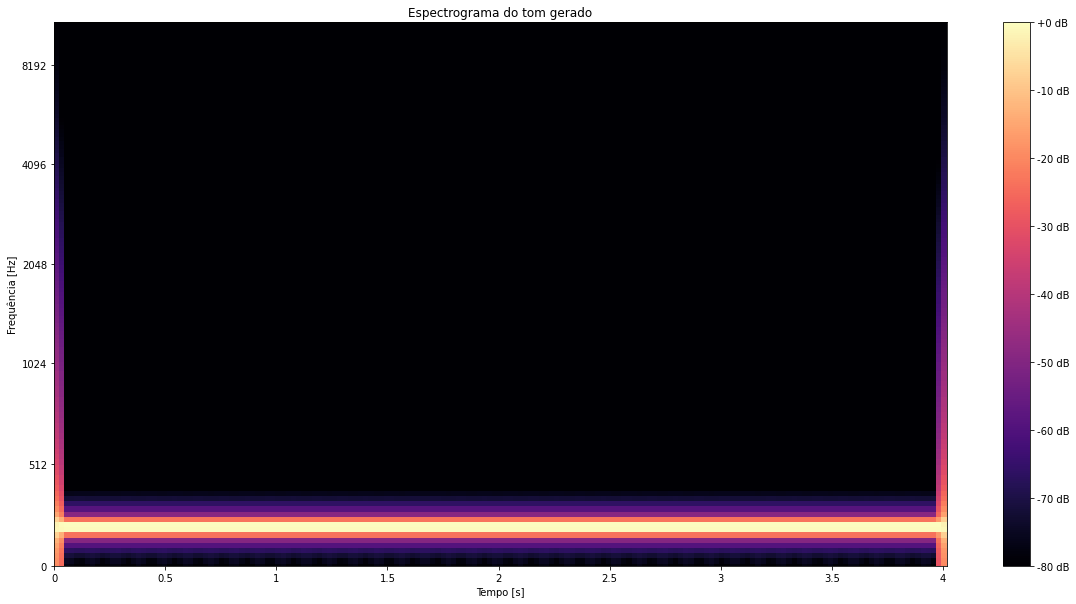

In [ ]:
# Geração de um tom

# Parametros do tom
tone_frequency_hz = 440
tone_sampling_rate = 44100
tone_duration_s = 2

# Criação do tom
tone = librosa.tone(tone_frequency_hz, sr=tone_sampling_rate, duration=tone_duration_s)

# Exibição do espectrograma do tom gerado
S = librosa.feature.melspectrogram(y=tone)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do tom gerado')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o tom gerado
ipd.Audio(tone, rate=44100)

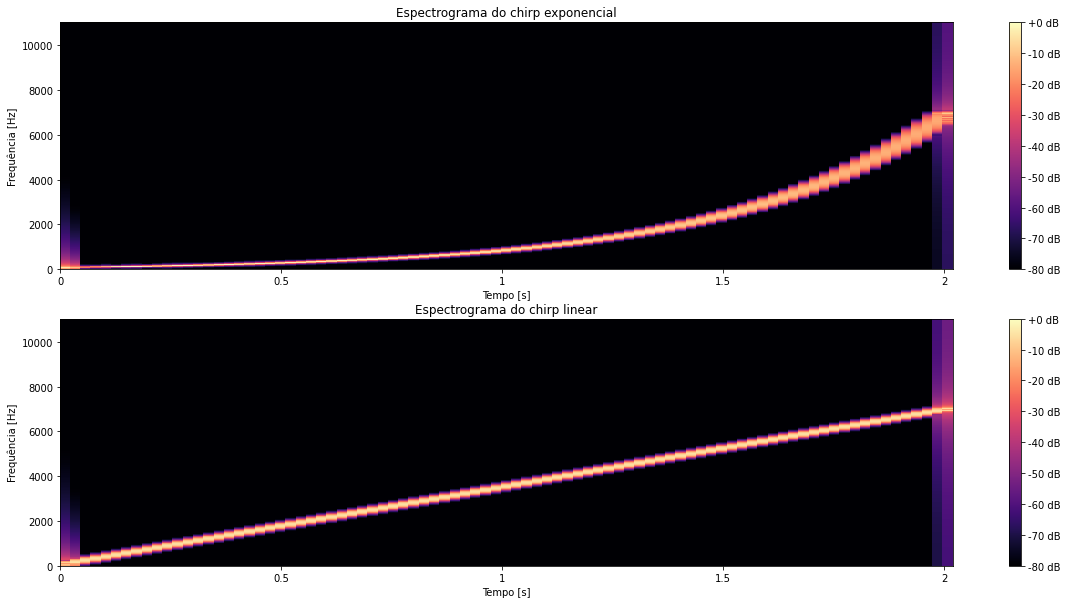

In [ ]:
# Geração de um chirp

# Parametros do chirp
chirp_min_frequency_hz = 110
chirp_max_frequency_hz = 110*64
chirp_sampling_rate = 44100
chirp_duration_s = 2

# Criação do chirp
chirp_exponential = librosa.chirp(chirp_min_frequency_hz, chirp_max_frequency_hz, duration=chirp_duration_s, linear=False)
chirp_linear = librosa.chirp(chirp_min_frequency_hz, chirp_max_frequency_hz, duration=chirp_duration_s, linear=True)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma do chirp exponencial no primeiro subplot
plt.subplot(2, 1, 1)
S_exponential = np.abs(librosa.stft(y=chirp_exponential))
librosa.display.specshow(librosa.amplitude_to_db(S_exponential, ref=np.max), x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do chirp exponencial')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Exibição do espectrograma do chirp linear no segundo subplot
plt.subplot(2, 1, 2)
S_linear = np.abs(librosa.stft(y=chirp_linear))
librosa.display.specshow(librosa.amplitude_to_db(S_linear, ref=np.max), x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do chirp linear')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Executa o áudio carregado
ipd.Audio(chirp_exponential, rate=chirp_sampling_rate)
#ipd.Audio(chirp_linear, rate=chirp_sampling_rate)

## Conceitos de Processamento de Áudio:

### Objetivo e usos

O Processamento de Áudio pode ser definido como um conjunto de técnicas que busca entender e manipular sons. É uma das classes mais importantes de Processamento de Sinais e essencial para as tecnologias de comunicação.

Uma característica interessante do processamento de áudio é que todas as técnicas são destinadas para a utilização humana. Dessa forma, os limites e condições das técnicas são baseadas apenas na audição humana, e não na tecnologia utilizada.

O Processamento de Áudio é uma classe gigantesca do Processamento de Sinais e não será tratada por completo nesse material. Existem livros e cursos inteiros dedicados ao assunto, como o livro “Fundamentals of Music Processing: Audio, Analysis, Algorithms, Applications” do Meinard Müller.

### Características da audição humana

A audição é um dos sentidos humanos mais utilizados para compreensão do mundo, sendo especialmente importante para a comunicação humana. O ouvido humano é uma estrutura altamente complexa que tem a capacidade de receber um estímulo de pressão externo (deslocamento de ar) e decodificar esse estímulo em diferentes frequências. Cada frequência é interpretada como um som diferente por nosso cérebro, e a somatórias das frequências desse estímulo gera o som que ouvimos.

O ouvido humano possui uma sensitividade impressionante, com uma diferença entre o som mais alto e mais baixo possível de aproximadamente 120 dB (ganho de um milhão em amplitude). É possível detectar mudanças no volume de cerca de 1 dB (uma mudança de 12% na amplitude). Em outras palavras, existem apenas cerca de 120 níveis de volume que podem ser percebidos.

A percepção de volume está aproximadamente relacionada a potência do sinal um expoente de 1/3. Por exemplo, se você aumentar a potencia do som por um fator de 10, um ouvinte vai dizer que o volume aumentou em aproximadamente 2 vezes ($10^{1/3} \approx 2$). Isso é um grande problema para eliminação de sons ambientais indesejáveis, porque mesmo que você consiga reduzir a potencia do sinal para apenas 1% do seu valor anterior, a redução de volume percebido será de apenas aproximadamente vezes ($0,01^{1/3} \approx 0,2$) ou $20\%$.

Devido ao ouvido humano ter uma sensibilidade logarítmica, é comum expressar intensidade sonora em uma escala logarítmica também, denominada decibel SPL (Sound Power Level). Nessa escala, 0 dB SPL é uma onda sonora com potência de $10^{-16} watts/cm^2$, que é aproximadamente o som mais baixo detectável pelo ouvido humano. Uma conversa normal fica a aproximadamente 60 dB SPL, enquanto dano aos ouvidos ocorre em cerca de 140 dB SPL. 

O alcance da audição humana é geralmente considerado de 20 Hz até 20kHz, mas é consideravelmente mais sensível a sons na faixa de 1 kHz até 4 kHz. Por exemplo, um ouvinte consegue detectar um som tão baixo quanto 0 dB SPL em 3 kHz, mas precisa de 40 dB SPL em 100 Hz (aumento na amplitude de 100 vezes). É possível diferenciar dois tons diferentes se a diferença de suas frequências for de 0,3% em 3 kHz. Essa diferença aumenta para 3% em 100 Hz. Para comparação, teclas adjacentes em um piano tem uma diferença de aproximadamente 6% de frequência entre elas.

Outra habilidade da audição humana é a detecção de direção de uma fonte sonora, usando dois canais receptores diferentes. Usando a diferença de tempo de um som ser recebido nos dois ouvidos humanos, podemos calcular a direção da fonte sonora, mas não a distância.  Alguns animais evoluíram para serem capazes de julgar a distância usando sons (eco localização), mas os humanos usualmente têm dificuldade para analisar distância baseada em sons.

### Timbre e conteúdo harmônico

A percepção de um som, como a nota de um instrumento musical é comumente dividido em três partes: volume, tom e timbre. Volume é a medição de intensidade sonora. Tom é a frequência da componente fundamental do som, que é a frequência com que a forma de onde se repete. Essas partes podem facilmente ser caracterizadas por quantidades físicas (magnitude e frequência). 

O timbre por outro lado é mais complexo, estando relacionado ao conteúdo harmônico do sinal. Vários sinais periódicos (como ondas quadradas e ondas triangulares) podem ser caracterizados por uma frequência fundamental e múltiplos dessa frequência fundamental (conhecidas como harmônicos). Seguindo essa linha, o conteúdo harmônico de um som são as frequências múltiplas de sua frequência fundamental. A combinação dessas harmônicas com sua frequência fundamental define o timbre, que é o som é percebido pelo ouvido humano. É importante observar que o ouvido humano é altamente insensível a fase dos sinais sonoros, usando apenas amplitude como referência para formação do timbre.

Um som pode facilmente ter o mesmo tom e timbres (conteúdos harmônicos) diferentes. Por exemplo, dois instrumentos musicais diferentes tocando a mesma nota musical serão percebidos de maneira completamente diferente pelo ouvido humano, pois seus timbres são diferentes. O ouvido humano é tão acostumado a detectar harmônicos que elas soam agradável para nós. A combinação de uma frequência fundamental com uma frequência não harmônica irá soar estranho ou desagradável para o ouvido humano.

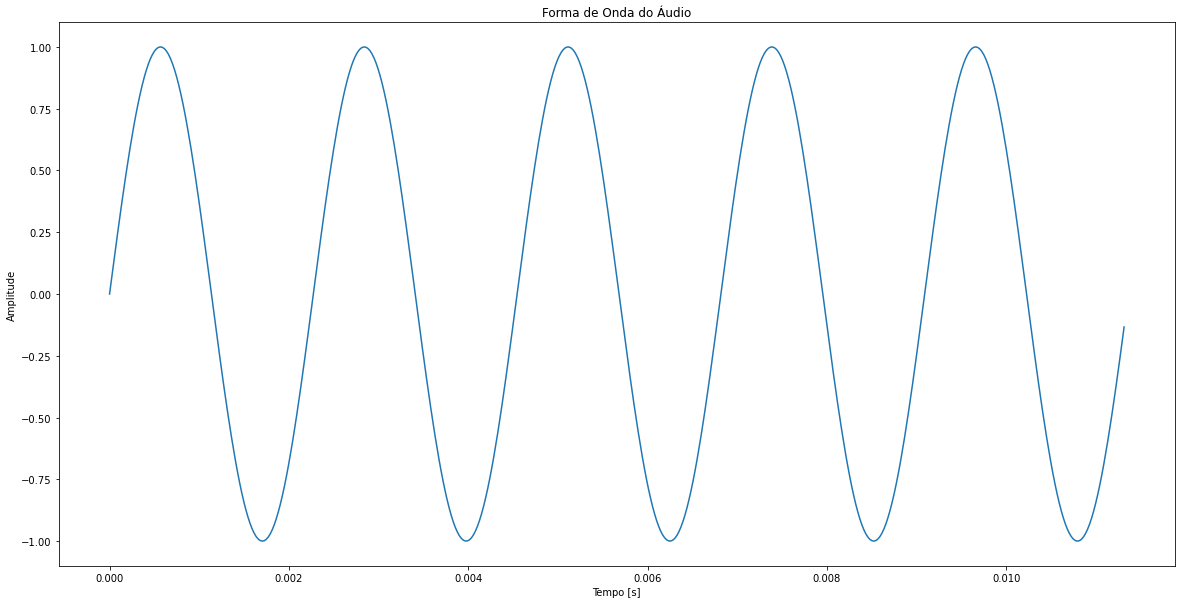

In [ ]:
# Demonstração de timbre e conteúdo harmônico (1/2)

# Parametros do som
sound_frequency_hz = 440
sound_sampling_rate = 44100
sound_duration_s = 2
sound_form = "sine" # sine | square | triangle | sawtooth

# Criação do som
sound_time = np.linspace(0, sound_duration_s, sound_sampling_rate*sound_duration_s, endpoint=False)

# Senoide pura
sound = np.sin(2*np.pi*sound_frequency_hz*sound_time)
#sound = sound + 0.5*np.sin(2*np.pi*2*sound_frequency_hz*sound_time)
#sound = sound + 0.5*np.sin(2*np.pi*2.2*sound_frequency_hz*sound_time)

# Onda quadrada
if (sound_form == "square") :
  sound = signal.square(2*np.pi*sound_frequency_hz*sound_time, duty=0.5)

# Onda Triangular
if (sound_form == "triangle") :
  sound = signal.sawtooth(2*np.pi*sound_frequency_hz*sound_time, width=0.5)

# Onda Dente de Serra
if (sound_form == "sawtooth") :
  sound = signal.sawtooth(2*np.pi*sound_frequency_hz*sound_time)

# Executa o áudio gerado
ipd.Audio(sound, rate=sound_sampling_rate)

# Exibição da Forma de Onda
fig = plt.figure()
plt.plot(sound_time[0:500], sound[0:500])
plt.title('Forma de Onda do Áudio')
plt.ylabel('Amplitude')
plt.xlabel('Tempo [s]')

# Executa o tom gerado
ipd.Audio(sound, rate=sound_sampling_rate)

Text(0.5, 0, 'Tempo [s]')

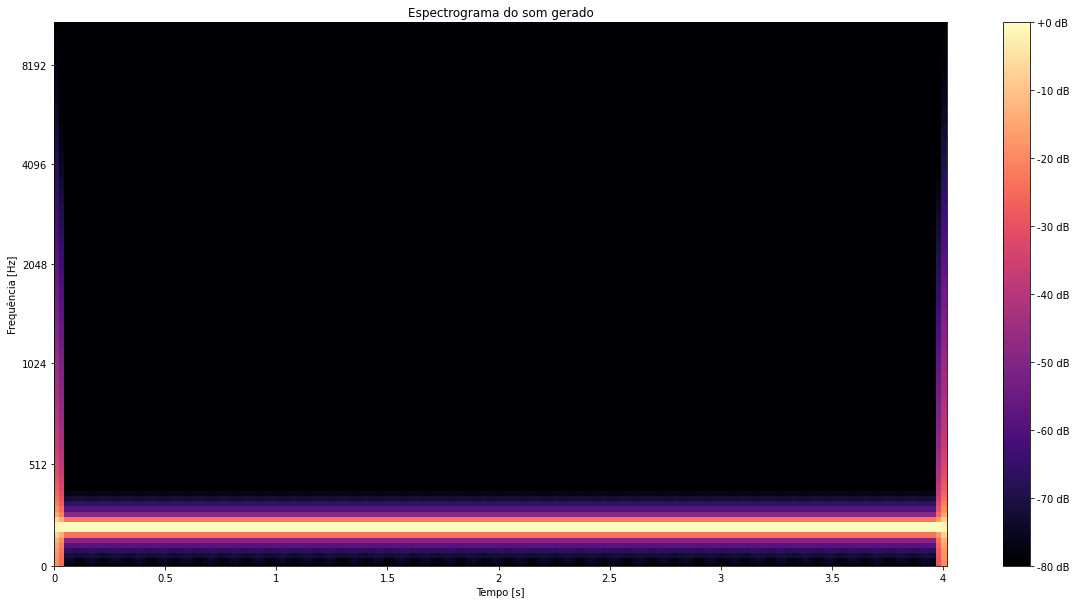

In [ ]:
# Demonstração de timbre e conteúdo harmônico (2/2)

# Exibição do espectrograma do som gerado
S = librosa.feature.melspectrogram(y=sound)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma do som gerado')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

### Áudio Analógico x Áudio Digital

Assim como existem técnicas de processamento de sinais analógicos e digitais, o mesmo ocorre para o processamento de áudio. No entanto, o áudio tem um escopo mais bem definido quando comparado com sinais genéricos.

Por exemplo, como a audição humana só consegue detectar até aproximadamente 20 kHz, é possível obter toda a informação audível ao se amostras com uma frequência maior que 40 kHz. Isso também significa que usar frequências de amostragem particularmente maiores do que 40 kHz não irá trazer nenhum benefício real.

Por outro lado, se estamos interessados apenas na voz humana (algo entre 50 Hz e 3400 Hz), aproximadamente 8 kHz de frequência de amostragem já é o suficiente para a correta captação da informação. 

Essas características permitem a criação de diferentes técnicas de armazenamento e utilização de áudio digital, dependendo do objetivo final da aplicação.

### Qualidade de som x Taxa de dados

Um ponto importante para o som digital é a relação entre qualidade e taxa de dados e como equilibrar os dois. Quanto maior a qualidade de um som, maior sua taxa de dados e armazenamento necessários. Isso pode ser um problema se o seu objetivo é, por exemplo, transmitir um som por grandes distancias com o menor custo. Degradando a qualidade do som se torna possível reduzir a sua taxa de dados necessária. Mas o quanto podemos degradar a qualidade do som? Depende diretamente da aplicação. Um exemplo de qualidade de som e suas taxas de dados comuns pode ser encontrado na tabela abaixo:

| Qualidade de Som Necessária                  | Largura de Banda   | Frequência de Amostragem | Número de bits | Taxa de dados (bits/sec) | Comentários                                                                    |
|----------------------------------------------|--------------------|--------------------------|----------------|--------------------------|--------------------------------------------------------------------------------|
| Música de Alta Fidelidade (CD)               | 5 Hz até 20 kHz    | 44,1 kHz                 | 16 bit         | 706k                     | Melhor que a audição humana                                                    |
| Fala na Qualidade de Telefone                | 200 Hz até 3,2 kHz | 8 kHz                    | 12 bit / 8 bit | 96k / 64k                | Fala boa, mas ruim para música. Possível reduzir a taxa com um ADC não-linear. |
| Fala codificada por Linear Predictive Coding | 200 Hz até 3,2 kHz | 8 kHz                    | 12 bit         | 4k                       | Técnica de compressão de fala com PDS. Qualidade de voz bem baixa.             |

### Áreas proeminentes

#### Reprodução musical com alta fidelidade

Técnicas que buscam reproduzir de maneira digital o áudio o mais fielmente possível. Exigem muito espaço de armazenamento e são utilizadas principalmente para o entretenimento humano (música, filmes, etc.). São capazes de captar e trabalhar com sons de qualidade maior que o ouvido humano consegue.

Alguma exemplos de aplicação dessa técnica são a gravação, reprodução e armazenamento de música, sejam em mídias físicas como CDs ou mídias digitais como arquivos .wav, .mp3, .flac, .ogg, etc...

#### Telecomunicação

Técnicas que buscam reproduzir de maneira digital a voz humana de maneira compreensível para o ouvinte. Geralmente são focadas na transmissão de sons e não em seu armazenamento. Por conta disso, buscam a menor taxa de dados possível (menores custos de transmissão) mesmo sacrificando qualidade do áudio. 

São essenciais para a telecomunicação moderna, permitindo o uso de aparelhos celulares e realização de vídeo-chamadas. Possuem baixa capacidade de reprodução musical, mas consegue reproduzir de maneira minimamente fiel a voz humana.

#### Síntese de fala e sons

Técnicas que buscam sintetizar de maneira digital a voz humana e sons. Tem usos desde transmissão de voz humana (sintetizar permite reduzir mais as taxas de dados) até permitir a comunicação de máquinas com humanos (atendimento telefônico automatizado, por exemplo).

Também podem ser usadas para composição de músicas e criação de instrumentos digitais, como teclados e sintetizadores. Um exemplo de coisas que se tornam possível fazer com essas técnicas é o padrão MIDI.

## Exemplo de aplicação:

### Equalizador de sons de 9 bandas

In [ ]:
# Importação de um arquivo de áudio

# Realiza o carregamento do arquivo de áudio
#piano_wav_sound, piano_wav_sampling_rate = librosa.load(filepath_input + '185347__lemoncreme__symphony-sounds.wav') 
music_wav_sound, music_wav_sampling_rate = librosa.load(filepath_input + '185347__lemoncreme__symphony-sounds.wav', mono=True, sr=None) 

# Executa o áudio carregado
ipd.Audio(music_wav_sound, rate=music_wav_sampling_rate)

Text(0.5, 0, 'Tempo [s]')

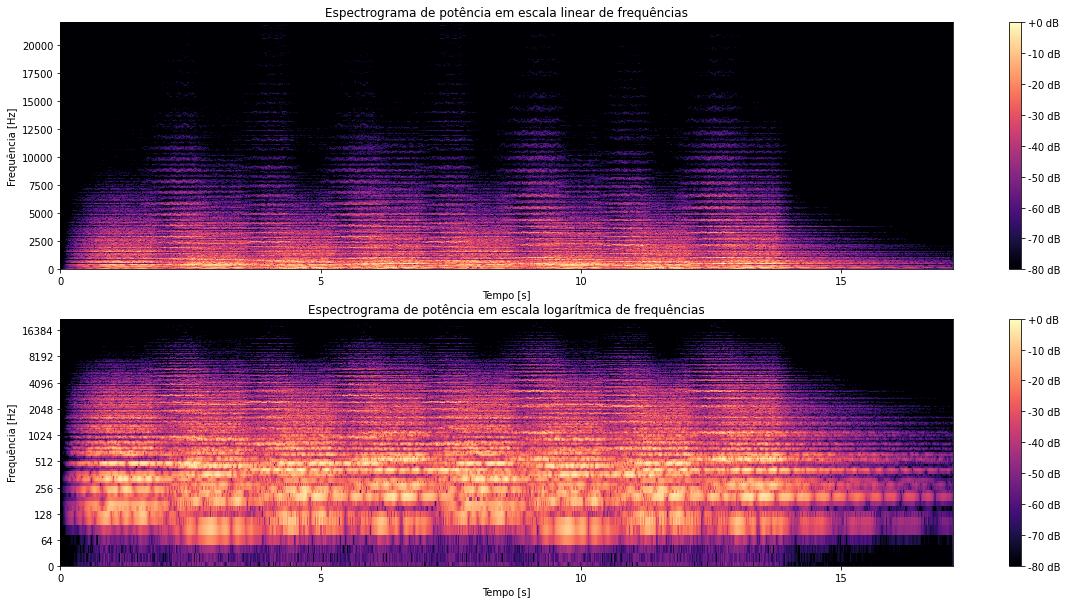

In [ ]:
# Geração de um Espectrograma do áudio

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(music_wav_sound)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala linear no primeiro subplot
plt.subplot(2, 1, 1)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=music_wav_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala linear de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Exibição do espectrograma em escala logarítmica no segundo subplot
plt.subplot(2, 1, 2)
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=music_wav_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')


In [ ]:
# Seleção dos ganhos do equalizador de 9 bandas

# Parametros de ganho do equalizador
equalizer_gain_max_db = 12
equalizer_gain_min_db = -12
equalizer_gain_max = (10**equalizer_gain_max_db)**(1/20)
equalizer_gain_min = (10**equalizer_gain_min_db)**(1/20)
equalizer_gain_min_base_10 = np.log10(equalizer_gain_min)
equalizer_gain_max_base_10 = np.log10(equalizer_gain_max)

# Cria sliders para seleção do ganho em cada banda
equalizer_gain_63_hz    = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='63 Hz')
equalizer_gain_125_hz   = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='125 Hz')
equalizer_gain_250_hz   = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='250 Hz')
equalizer_gain_500_hz   = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='500 Hz')
equalizer_gain_1000_hz  = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='1000 Hz')
equalizer_gain_2000_hz  = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='2000 Hz')
equalizer_gain_4000_hz  = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='4000 Hz')
equalizer_gain_8000_hz  = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='8000 Hz')
equalizer_gain_16000_hz = widgets.FloatLogSlider(value=1, base=10, min=equalizer_gain_min_base_10, max=equalizer_gain_max_base_10, step=0.01, description='16000 Hz')

# Exibe os sliders de cada banda
display(equalizer_gain_63_hz)
display(equalizer_gain_125_hz)
display(equalizer_gain_250_hz)
display(equalizer_gain_500_hz)
display(equalizer_gain_1000_hz)
display(equalizer_gain_2000_hz)
display(equalizer_gain_4000_hz)
display(equalizer_gain_8000_hz)
display(equalizer_gain_16000_hz)

FloatLogSlider(value=1.0, description='63 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='125 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='250 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='500 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='1000 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='2000 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='4000 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='8000 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

FloatLogSlider(value=1.0, description='16000 Hz', max=0.6000000000000001, min=-0.6, step=0.01)

In [ ]:
# Criação de um filtro personalizado (resposta do equalizador) e resposta ao impulso

# Resposta em frequência desejada
freq_samples = 4096
custom_freqs = np.linspace(0, 1, np.int(freq_samples/2))
#custom_gains = np.linspace(1, 0, np.int(freq_samples/2))
custom_gains = np.ones(np.int(freq_samples/2))
for i in range(len(custom_gains)):
  if (custom_freqs[i]*music_wav_sampling_rate/2) <= 88.63:
    custom_gains[i] = custom_gains[i]*equalizer_gain_63_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 177.17:
    custom_gains[i] = custom_gains[i]*equalizer_gain_125_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 354.16:
    custom_gains[i] = custom_gains[i]*equalizer_gain_250_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 707.95:
    custom_gains[i] = custom_gains[i]*equalizer_gain_500_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 1415.14:
    custom_gains[i] = custom_gains[i]*equalizer_gain_1000_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 2828.78:
    custom_gains[i] = custom_gains[i]*equalizer_gain_2000_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 5654.57:
    custom_gains[i] = custom_gains[i]*equalizer_gain_4000_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 11303.16:
    custom_gains[i] = custom_gains[i]*equalizer_gain_8000_hz.value
  elif (custom_freqs[i]*music_wav_sampling_rate/2) <= 21000:
    custom_gains[i] = custom_gains[i]*equalizer_gain_16000_hz.value
  else:
    custom_gains[i] = 0

# Caracteristicas dos filtros
filter_taps = 1024

# Geração dos coeficientes do filtro personalizado com janela Hamming
fcustom_coefficients_hamming = signal.firwin2(filter_taps, custom_freqs, custom_gains, window='hamming')

# Geração dos coeficientes dos filtros com janela Blackman
fcustom_coefficients_blackman = signal.firwin2(filter_taps, custom_freqs, custom_gains, window='blackman')

# Geração de um impulso unitário
impulse_response_samples = 1024
signal_impulse = signal.unit_impulse(impulse_response_samples)

# Geração da resposta ao impulso dos filtros
impulse_response_hamming = signal.lfilter(fcustom_coefficients_hamming, 1.0, signal_impulse)
impulse_response_blackman = signal.lfilter(fcustom_coefficients_blackman, 1.0, signal_impulse)
#impulse_response_hamming = signal.convolve(fcustom_coefficients_hamming, signal_impulse)
#impulse_response_blackman = signal.convolve(fcustom_coefficients_blackman, signal_impulse)

# Geração da resposta em frequência dos filtros
fft_filter_hamming = np.fft.fftshift(np.fft.fft(impulse_response_hamming, impulse_response_samples))
fft_filter_blackman = np.fft.fftshift(np.fft.fft(impulse_response_blackman, impulse_response_samples))
fft_freqs = np.fft.fftshift(np.fft.fftfreq(impulse_response_samples))

# Criação da figura
fig = plt.figure()

# Criação do primeiro subplot
plt.subplot(2, 2, 1)
plt.plot(fft_freqs, 20*np.log10(np.absolute(fft_filter_hamming)), "-b", label='Hamming')
plt.plot(fft_freqs, 20*np.log10(np.absolute(fft_filter_blackman)), "--r", label='Blackman')
plt.legend()
plt.title('Magnitudes dos filtros de Sinc-Janelado')
plt.ylabel('Ganho [dB]')
plt.xlabel('Frequência [ciclos por amostra]')

# Criação do segundo subplot
plt.subplot(2, 2, 2)
plt.plot(fft_freqs, np.absolute(fft_filter_hamming), "-b", label='Hamming')
plt.plot(fft_freqs, np.absolute(fft_filter_blackman), "--r", label='Blackman')
plt.legend()
plt.title('Magnitudes dos filtros de Sinc-Janelado')
plt.ylabel('Ganho [-]')
plt.xlabel('Frequência [ciclos por amostra]')

# Criação do terceiro subplot
plt.subplot(2, 2, 3)
plt.plot(impulse_response_hamming[:filter_taps], "-b", label='Hamming')
plt.plot(impulse_response_blackman[:filter_taps], "--r", label='Blackman')
plt.legend()
plt.title('Resposta ao impulso unitário dos filtros de Sinc-Janelado')
plt.ylabel('Amplitude')
plt.xlabel('Amostra')

# Criação do quarto subplot
plt.subplot(2, 2, 4)
plt.plot(fft_freqs, np.angle(fft_filter_hamming), "-b", label='Hamming')
plt.plot(fft_freqs, np.angle(fft_filter_blackman), "--r", label='Blackman')
plt.legend()
plt.title('Fases dos filtros de Sinc-Janelado')
plt.ylabel('Fase [rad]')
plt.xlabel('Frequência [ciclos por amostra]')

# Criação e exibição de tooltips no gráfico
mpld3.plugins.connect(fig, mpld3.plugins.MousePosition(fontsize=14))
mpld3.display()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10


In [ ]:
# Aplicação do filtro de equalização
music_wav_sound_equalized = signal.lfilter(fcustom_coefficients_hamming, 1.0, music_wav_sound)
#music_wav_sound_equalized = signal.lfilter(fcustom_coefficients_blackman, 1.0, music_wav_sound)

# Executa o áudio carregado
ipd.Audio(music_wav_sound_equalized, rate=music_wav_sampling_rate)

Text(0.5, 0, 'Tempo [s]')

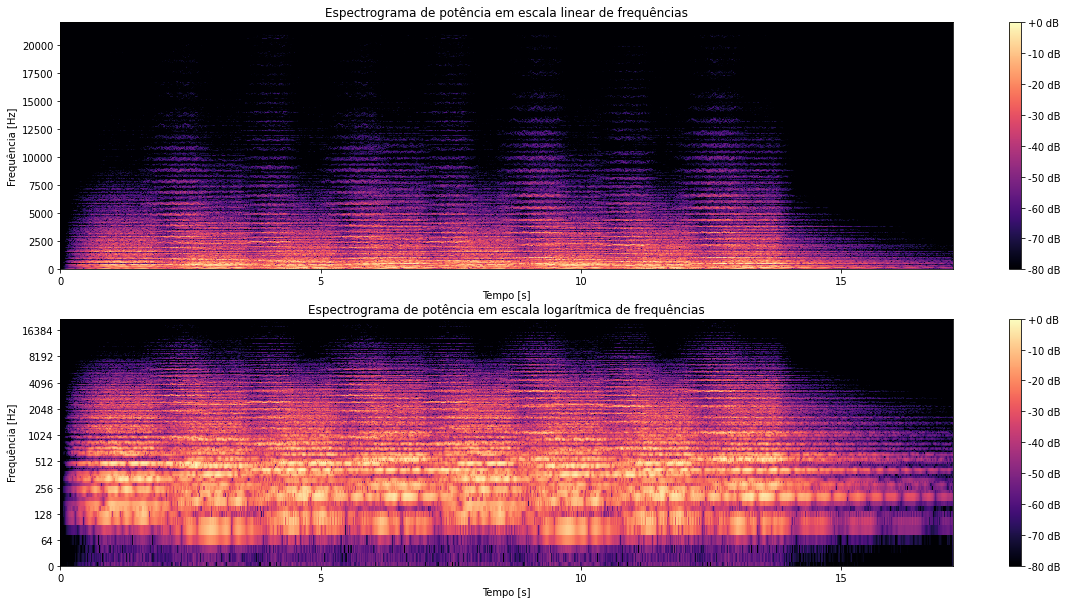

In [ ]:
# Geração de um Espectrograma do Áudio Equalizado

# Cálculo do espectrograma
D = librosa.amplitude_to_db(np.abs(librosa.stft(music_wav_sound_equalized)), ref=np.max)

# Criação da figura
fig = plt.figure()

# Exibição do espectrograma em escala linear no primeiro subplot
plt.subplot(2, 1, 1)
librosa.display.specshow(D, y_axis='linear', x_axis='time', sr=music_wav_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala linear de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')

# Exibição do espectrograma em escala logarítmica no segundo subplot
plt.subplot(2, 1, 2)
librosa.display.specshow(D, y_axis='log', x_axis='time', sr=music_wav_sampling_rate)
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de potência em escala logarítmica de frequências')
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')


In [ ]:
# Exportação do áudio equalizado

# Escreve o arquivo de áudio equalizado como 24bit PCM WAV
sf.write(filepath_output + 'equalized_sound_file.wav', music_wav_sound_equalized, music_wav_sampling_rate, subtype='PCM_24')
